## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap XMAS scan (sneaky)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [2]:
directory = '/home/USER/notebooks/pcaps/nmap_xmas_scan_sneaky'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [3]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

2197    16484.310798
Name: time, dtype: float64

In [4]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [5]:
scan_times
#duration_list

0    16484.310798
1    16483.939228
2    16484.281890
3    16484.174095
4    16484.303372
5    16484.208663
6    16483.989683
7    16484.261647
8    16484.185215
9    16484.271983
Name: Scan times, dtype: float64

In [6]:
temp = pd.DataFrame(duration_list)

In [7]:
temp.mean()

0    16484.192657
dtype: float64

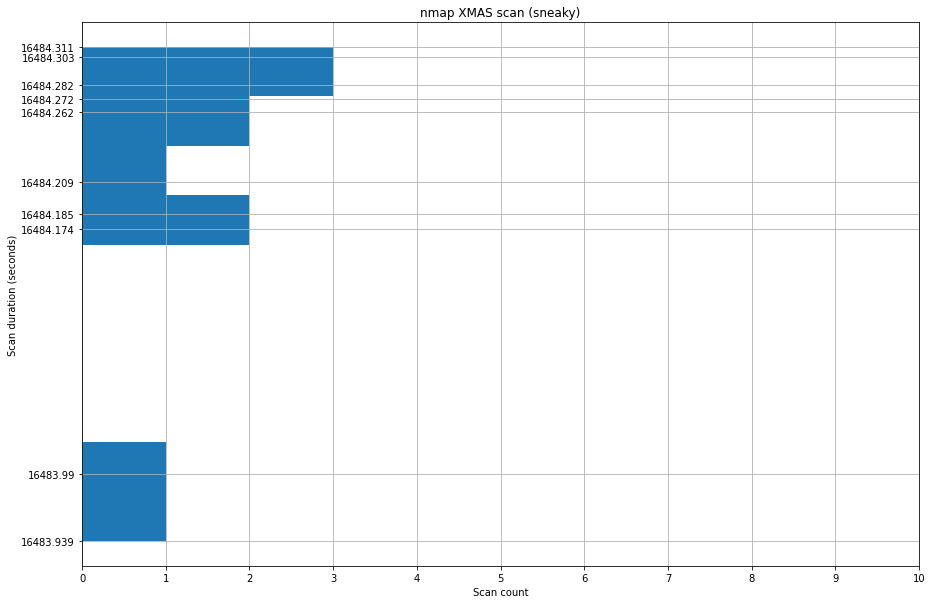

In [8]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [9]:
temp.describe()

,0
count,10.000000
mean,16484.192657
std,0.129662
min,16483.939228
25%,16484.176875
50%,16484.235155
75%,16484.279413
max,16484.310798


## Packet count

In [10]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [11]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 21980
Overall sent packets to scanner: 10990
Overall received packets from scanner: 10990


## Packets pr. second

In [12]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 1.333398635696627



## Order of ports scanned


In [13]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 54926 111
2 54926 256
3 54926 1723
4 54926 22
5 54926 139
6 54926 199
7 54926 3306
8 54926 445
9 54926 8888
10 54926 8080
11 54931 111
12 54926 143
13 54926 3389
14 54926 554
15 54926 1025
16 54926 5900
17 54926 110
18 54926 443
19 54926 53
20 54926 995
21 54926 23
22 54933 111
23 54926 113
24 54926 80
25 54926 993
26 54926 587
27 54926 25
28 54926 21
29 54926 135
30 54926 1720
31 54926 11967
32 54926 2021
33 54935 111
34 54926 50500
35 54926 9100
36 54926 714
37 54926 9071
38 54926 1234
39 54926 4321
40 54926 10628
41 54926 100
42 54926 6389
43 54926 280
44 54937 111
45 54926 2022
46 54926 1164
47 54926 16018
48 54926 3013
49 54926 6007
50 54926 8290
51 54926 3493
52 54926 8651
53 54926 49152
54 54926 1102
55 54939 111
56 54926 6543
57 54926 700
58 54926 880
59 54926 3370
60 54926 19350
61 54926 1053
62 54926 2968
63 54926 49154
64 54926 5440
65 54926 444
66 54941 111
67 54926 6969
68 54926 2035
69 54926 2043
70 54926 8082
71 54926 2002
72 54926 787
73 54926 9618
74 54926 1036
75 54

624 54926 12265
625 54926 1783
626 54926 4446
627 55043 111
628 54926 1082
629 54926 38292
630 54926 541
631 54926 1081
632 54926 52848
633 54926 1641
634 54926 1192
635 54926 2007
636 54926 2811
637 54926 524
638 55045 111
639 54926 1721
640 54926 1782
641 54926 2601
642 54926 51103
643 54926 1049
644 54926 911
645 54926 4444
646 54926 2005
647 54926 10778
648 54926 800
649 55047 111
650 54926 8022
651 54926 7920
652 54926 1971
653 54926 1717
654 54926 1805
655 54926 6565
656 54926 4662
657 54926 1174
658 54926 1131
659 54926 1111
660 55049 111
661 54926 8002
662 54926 1185
663 54926 5815
664 54926 19101
665 54926 5811
666 54926 24800
667 54926 1043
668 54926 9503
669 54926 1034
670 54926 7200
671 55051 111
672 54926 389
673 54926 1271
674 54926 65389
675 54926 783
676 54926 6001
677 54926 705
678 54926 32781
679 54926 5102
680 54926 7002
681 54926 2967
682 55053 111
683 54926 2107
684 54926 32780
685 54926 2393
686 54926 5004
687 54926 666
688 54926 3268
689 54926 2103
690 54926 4916

191 39872 5963
192 39872 1067
193 39872 179
194 39872 6779
195 39872 1233
196 39872 2196
197 39872 49159
198 39911 110
199 39872 10215
200 39872 5907
201 39872 1099
202 39872 3826
203 39872 8087
204 39872 2001
205 39872 407
206 39872 625
207 39872 2522
208 39872 40193
209 39913 110
210 39872 8100
211 39872 2068
212 39872 9618
213 39872 7002
214 39872 20222
215 39872 32779
216 39872 2045
217 39872 8083
218 39872 3659
219 39872 3322
220 39915 110
221 39872 19283
222 39872 5550
223 39872 1192
224 39872 50000
225 39872 1069
226 39872 1309
227 39872 3551
228 39872 8400
229 39872 8086
230 39872 3370
231 39917 110
232 39872 5959
233 39872 5925
234 39872 3005
235 39872 5906
236 39872 1065
237 39872 3017
238 39872 3878
239 39872 3168
240 39872 2022
241 39872 555
242 39919 110
243 39872 1114
244 39872 6106
245 39872 2393
246 39872 1090
247 39872 49
248 39872 1117
249 39872 2161
250 39872 6565
251 39872 6129
252 39872 5802
253 39921 110
254 39872 99
255 39872 14238
256 39872 1108
257 39872 3476
2

858 40031 110
859 39872 8085
860 39872 4242
861 39872 2909
862 39872 49176
863 39872 30000
864 39872 5679
865 39872 1034
866 39872 1148
867 39872 10778
868 39872 1047
869 40033 110
870 39872 2251
871 39872 5859
872 39872 1199
873 39872 1761
874 39872 2046
875 39872 10024
876 39872 1163
877 39872 1045
878 39872 3367
879 39872 11111
880 40035 110
881 39872 1039
882 39872 668
883 39872 7938
884 39872 5357
885 39872 2718
886 39872 8649
887 39872 10012
888 39872 1107
889 39872 4662
890 39872 49165
891 40037 110
892 39872 1600
893 39872 5432
894 39872 49154
895 39872 42510
896 39872 10617
897 39872 5030
898 39872 2106
899 39872 106
900 39872 6502
901 39872 8194
902 40039 110
903 39872 8994
904 39872 14442
905 39872 14441
906 39872 1052
907 39872 1043
908 39872 3827
909 39872 19801
910 39872 6346
911 39872 5810
912 39872 8193
913 40041 110
914 39872 3851
915 39872 1007
916 39872 8300
917 39872 3998
918 39872 49163
919 39872 981
920 39872 10004
921 39872 3372
922 39872 1119
923 39872 6666
924 

425 52406 6000
426 52406 668
427 52406 55555
428 52406 18040
429 52487 443
430 52406 5061
431 52406 1036
432 52406 10024
433 52406 9998
434 52406 5925
435 52406 9009
436 52406 1111
437 52406 5907
438 52406 515
439 52406 8099
440 52489 443
441 52406 12265
442 52406 5431
443 52406 49153
444 52406 32768
445 52406 1058
446 52406 8085
447 52406 8021
448 52406 1071
449 52406 417
450 52406 30
451 52491 443
452 52406 10025
453 52406 1049
454 52406 17
455 52406 1455
456 52406 4446
457 52406 2869
458 52406 545
459 52406 16000
460 52406 1102
461 52406 1287
462 52493 443
463 52406 5001
464 52406 1122
465 52406 3325
466 52406 2040
467 52406 7777
468 52406 19350
469 52406 10010
470 52406 8800
471 52406 5815
472 52406 22939
473 52495 443
474 52406 1040
475 52406 16113
476 52406 843
477 52406 5298
478 52406 1145
479 52406 2006
480 52406 1
481 52406 49163
482 52406 10243
483 52406 55056
484 52497 443
485 52406 2010
486 52406 5357
487 52406 50002
488 52406 89
489 52406 1301
490 52406 42510
491 52406 273

1092 52406 8086
1093 52406 3517
1094 52406 5087
1095 52406 16001
1096 52406 8042
1097 52406 10082
1098 52406 2021
1099 52406 7001
1 34231 80
2 34231 143
3 34231 8080
4 34231 113
5 34231 23
6 34231 554
7 34231 110
8 34231 135
9 34231 1720
10 34231 587
11 34236 80
12 34231 21
13 34231 8888
14 34231 995
15 34231 445
16 34231 5900
17 34231 1723
18 34231 139
19 34231 199
20 34231 111
21 34231 443
22 34238 80
23 34231 993
24 34231 3389
25 34231 25
26 34231 53
27 34231 256
28 34231 3306
29 34231 22
30 34231 1025
31 34231 19315
32 34231 5902
33 34240 80
34 34231 458
35 34231 12265
36 34231 1132
37 34231 1102
38 34231 1201
39 34231 5850
40 34231 7019
41 34231 6003
42 34231 49157
43 34231 1023
44 34242 80
45 34231 32780
46 34231 6789
47 34231 1998
48 34231 1112
49 34231 631
50 34231 902
51 34231 10215
52 34231 1352
53 34231 1272
54 34231 9101
55 34244 80
56 34231 52822
57 34231 548
58 34231 5405
59 34231 32769
60 34231 8443
61 34231 10566
62 34231 2251
63 34231 82
64 34231 65000
65 34231 6001
66

659 34231 2041
660 34354 80
661 34231 11111
662 34231 64680
663 34231 70
664 34231 33354
665 34231 9593
666 34231 9
667 34231 6510
668 34231 5810
669 34231 259
670 34231 5200
671 34356 80
672 34231 1108
673 34231 10010
674 34231 1166
675 34231 636
676 34231 1700
677 34231 49165
678 34231 20222
679 34231 1914
680 34231 60020
681 34231 1021
682 34358 80
683 34231 5906
684 34231 1086
685 34231 3971
686 34231 1078
687 34231 34573
688 34231 722
689 34231 5560
690 34231 2047
691 34231 1521
692 34231 1433
693 34360 80
694 34231 1718
695 34231 1081
696 34231 30000
697 34231 1164
698 34231 783
699 34231 3001
700 34231 31337
701 34231 2000
702 34231 6792
703 34231 65129
704 34362 80
705 34231 7435
706 34231 407
707 34231 2033
708 34231 7002
709 34231 5080
710 34231 1999
711 34231 109
712 34231 1500
713 34231 7778
714 34231 3800
715 34364 80
716 34231 19842
717 34231 45100
718 34231 1082
719 34231 1580
720 34231 1864
721 34231 3372
722 34231 2602
723 34231 16018
724 34231 1070
725 34231 2010
726 

192 55619 1097
193 55619 9040
194 55619 7002
195 55619 3323
196 55619 5004
197 55619 20005
198 55658 110
199 55619 1328
200 55619 1099
201 55619 2323
202 55619 1719
203 55619 311
204 55619 38292
205 55619 497
206 55619 6000
207 55619 2100
208 55619 668
209 55660 110
210 55619 3003
211 55619 2004
212 55619 2910
213 55619 84
214 55619 1073
215 55619 7201
216 55619 3527
217 55619 15742
218 55619 903
219 55619 100
220 55662 110
221 55619 749
222 55619 3168
223 55619 254
224 55619 10566
225 55619 902
226 55619 3517
227 55619 6547
228 55619 777
229 55619 3920
230 55619 1076
231 55664 110
232 55619 44501
233 55619 2800
234 55619 32782
235 55619 4848
236 55619 9485
237 55619 2042
238 55619 9101
239 55619 1037
240 55619 1234
241 55619 2301
242 55666 110
243 55619 7200
244 55619 2001
245 55619 616
246 55619 6002
247 55619 1875
248 55619 5225
249 55619 16993
250 55619 2170
251 55619 2049
252 55619 1149
253 55668 110
254 55619 9100
255 55619 5988
256 55619 5440
257 55619 1056
258 55619 1461
259 55

893 55619 8008
894 55619 2500
895 55619 23502
896 55619 4998
897 55619 514
898 55619 3546
899 55619 1042
900 55619 1947
901 55619 13722
902 55786 110
903 55619 5357
904 55619 1687
905 55619 2717
906 55619 52848
907 55619 2099
908 55619 3493
909 55619 8400
910 55619 2035
911 55619 3006
912 55619 9002
913 55788 110
914 55619 4126
915 55619 1033
916 55619 5269
917 55619 9110
918 55619 1183
919 55619 1600
920 55619 1971
921 55619 62078
922 55619 32783
923 55619 1067
924 55790 110
925 55619 7911
926 55619 9998
927 55619 1070
928 55619 2601
929 55619 9207
930 55619 52822
931 55619 2043
932 55619 1443
933 55619 3017
934 55619 406
935 55792 110
936 55619 1038
937 55619 8899
938 55619 8087
939 55619 4567
940 55619 50800
941 55619 6346
942 55619 4129
943 55619 2038
944 55619 6788
945 55619 8402
946 55794 110
947 55619 8443
948 55619 5432
949 55619 1095
950 55619 1900
951 55619 8083
952 55619 30951
953 55619 18988
954 55619 6789
955 55619 8800
956 55619 1244
957 55796 110
958 55619 1105
959 55619

461 48055 7999
462 48142 3389
463 48055 10617
464 48055 13722
465 48055 1812
466 48055 5802
467 48055 2710
468 48055 1092
469 48055 10243
470 48055 27000
471 48055 10025
472 48055 8194
473 48144 3389
474 48055 259
475 48055 1024
476 48055 311
477 48055 1755
478 48055 306
479 48055 902
480 48055 1072
481 48055 1334
482 48055 8181
483 48055 5214
484 48146 3389
485 48055 43
486 48055 700
487 48055 10010
488 48055 616
489 48055 5815
490 48055 1658
491 48055 1077
492 48055 1041
493 48055 27355
494 48055 1098
495 48148 3389
496 48055 3801
497 48055 9968
498 48055 9003
499 48055 2106
500 48055 25734
501 48055 8222
502 48055 16016
503 48055 50300
504 48055 3351
505 48055 1433
506 48150 3389
507 48055 1052
508 48055 8254
509 48055 38292
510 48055 16018
511 48055 2022
512 48055 9666
513 48055 2638
514 48055 6901
515 48055 6669
516 48055 3828
517 48152 3389
518 48055 3945
519 48055 6009
520 48055 500
521 48055 2007
522 48055 2811
523 48055 7920
524 48055 31038
525 48055 4000
526 48055 1
527 48055

28 41228 8888
29 41228 111
30 41228 8080
31 41228 10012
32 41228 32784
33 41237 3306
34 41228 4899
35 41228 6547
36 41228 17
37 41228 1087
38 41228 7
39 41228 5560
40 41228 55056
41 41228 5730
42 41228 3211
43 41228 1501
44 41239 3306
45 41228 8008
46 41228 49167
47 41228 5033
48 41228 5102
49 41228 54328
50 41228 1107
51 41228 1999
52 41228 3404
53 41228 50636
54 41228 3006
55 41241 3306
56 41228 7019
57 41228 783
58 41228 5414
59 41228 1658
60 41228 1093
61 41228 20031
62 41228 1164
63 41228 8192
64 41228 1104
65 41228 30000
66 41243 3306
67 41228 616
68 41228 1287
69 41228 2492
70 41228 7676
71 41228 5998
72 41228 720
73 41228 1236
74 41228 49999
75 41228 8001
76 41228 427
77 41245 3306
78 41228 26
79 41228 1110
80 41228 33
81 41228 548
82 41228 1099
83 41228 2399
84 41228 8400
85 41228 9009
86 41228 687
87 41228 1455
88 41247 3306
89 41228 458
90 41228 1060
91 41228 3766
92 41228 31337
93 41228 3869
94 41228 14238
95 41228 593
96 41228 254
97 41228 726
98 41228 2106
99 41249 3306
1

695 41228 3007
696 41228 5815
697 41228 1148
698 41228 1147
699 41228 5910
700 41228 4242
701 41228 32780
702 41228 3221
703 41228 6106
704 41359 3306
705 41228 5440
706 41228 648
707 41228 9535
708 41228 19315
709 41228 6346
710 41228 1334
711 41228 55600
712 41228 1700
713 41228 33899
714 41228 10001
715 41361 3306
716 41228 2038
717 41228 1175
718 41228 2393
719 41228 1070
720 41228 2105
721 41228 3945
722 41228 9999
723 41228 749
724 41228 1947
725 41228 42510
726 41363 3306
727 41228 6881
728 41228 3300
729 41228 3269
730 41228 1935
731 41228 765
732 41228 8292
733 41228 7200
734 41228 2107
735 41228 52869
736 41228 5225
737 41365 3306
738 41228 1002
739 41228 4567
740 41228 20221
741 41228 109
742 41228 9200
743 41228 32768
744 41228 1100
745 41228 3986
746 41228 1234
747 41228 52848
748 41367 3306
749 41228 2160
750 41228 1594
751 41228 1038
752 41228 8800
753 41228 27356
754 41228 10617
755 41228 1524
756 41228 8090
757 41228 1761
758 41228 1218
759 41369 3306
760 41228 10002
7

262 45823 7676
263 45823 3995
264 45874 5900
265 45823 1863
266 45823 56738
267 45823 13
268 45823 2383
269 45823 6789
270 45823 9103
271 45823 5963
272 45823 12000
273 45823 4445
274 45823 9080
275 45876 5900
276 45823 1352
277 45823 2068
278 45823 83
279 45823 2251
280 45823 1097
281 45823 49400
282 45823 1105
283 45823 1201
284 45823 9877
285 45823 2525
286 45878 5900
287 45823 1271
288 45823 1114
289 45823 37
290 45823 1026
291 45823 1417
292 45823 1
293 45823 714
294 45823 1455
295 45823 3918
296 45823 7004
297 45880 5900
298 45823 9050
299 45823 1183
300 45823 648
301 45823 8086
302 45823 6000
303 45823 11110
304 45823 65129
305 45823 1099
306 45823 5560
307 45823 5902
308 45882 5900
309 45823 9999
310 45823 14238
311 45823 10001
312 45823 8500
313 45823 7627
314 45823 49163
315 45823 1600
316 45823 16000
317 45823 1081
318 45823 2048
319 45884 5900
320 45823 6547
321 45823 65000
322 45823 7106
323 45823 2005
324 45823 1065
325 45823 10012
326 45823 8180
327 45823 49999
328 45823

929 45823 4004
930 45823 1947
931 45823 1862
932 45823 2718
933 45823 3784
934 45823 5432
935 45996 5900
936 45823 31337
937 45823 7443
938 45823 1433
939 45823 1151
940 45823 7778
941 45823 406
942 45823 42510
943 45823 125
944 45823 2608
945 45823 1042
946 45998 5900
947 45823 32785
948 45823 8290
949 45823 1812
950 45823 3325
951 45823 3914
952 45823 32776
953 45823 255
954 45823 1169
955 45823 19101
956 45823 3323
957 46000 5900
958 45823 4126
959 45823 1104
960 45823 5550
961 45823 13782
962 45823 2710
963 45823 10010
964 45823 3493
965 45823 146
966 45823 1100
967 45823 2393
968 46002 5900
969 45823 11967
970 45823 7
971 45823 8007
972 45823 2107
973 45823 9200
974 45823 1074
975 45823 1277
976 45823 24444
977 45823 16113
978 45823 5060
979 46004 5900
980 45823 3221
981 45823 2200
982 45823 625
983 45823 2998
984 45823 1594
985 45823 8383
986 45823 5961
987 45823 1700
988 45823 541
989 45823 8701
990 46006 5900
991 45823 1300
992 45823 5298
993 45823 32769
994 45823 543
995 45823

381 57005 2875
382 57005 65000
383 57005 8089
384 57005 49152
385 57078 3306
386 57005 2013
387 57005 8042
388 57005 3945
389 57005 5120
390 57005 17
391 57005 2005
392 57005 6669
393 57005 5100
394 57005 7402
395 57005 1045
396 57080 3306
397 57005 8010
398 57005 1443
399 57005 1812
400 57005 7777
401 57005 2251
402 57005 8443
403 57005 5987
404 57005 625
405 57005 1113
406 57005 6792
407 57082 3306
408 57005 1076
409 57005 2008
410 57005 9000
411 57005 2701
412 57005 1092
413 57005 4444
414 57005 6001
415 57005 3920
416 57005 54045
417 57005 27715
418 57084 3306
419 57005 8088
420 57005 11110
421 57005 7627
422 57005 49167
423 57005 1034
424 57005 720
425 57005 6543
426 57005 6004
427 57005 1300
428 57005 16992
429 57086 3306
430 57005 2800
431 57005 2000
432 57005 34572
433 57005 1147
434 57005 6002
435 57005 8873
436 57005 5269
437 57005 616
438 57005 44442
439 57005 2998
440 57088 3306
441 57005 5544
442 57005 32782
443 57005 2602
444 57005 5004
445 57005 1082
446 57005 1089
447 5

953 57005 22939
954 57005 1104
955 57005 3517
956 57005 1183
957 57182 3306
958 57005 1875
959 57005 1580
960 57005 1068
961 57005 7938
962 57005 5822
963 57005 50006
964 57005 23502
965 57005 2608
966 57005 1085
967 57005 1111
968 57184 3306
969 57005 5850
970 57005 6788
971 57005 1049
972 57005 990
973 57005 1062
974 57005 4242
975 57005 16000
976 57005 1107
977 57005 1121
978 57005 1259
979 57186 3306
980 57005 3030
981 57005 31337
982 57005 9502
983 57005 106
984 57005 3
985 57005 500
986 57005 15660
987 57005 8180
988 57005 787
989 57005 4900
990 57188 3306
991 57005 2394
992 57005 5952
993 57005 10778
994 57005 41511
995 57005 2968
996 57005 2040
997 57005 32771
998 57005 5200
999 57005 55600
1000 57005 5432
1001 57190 3306
1002 57005 3367
1003 57005 2607
1004 57005 7921
1005 57005 49999
1006 57005 749
1007 57005 6005
1008 57005 1152
1009 57005 8649
1010 57005 2382
1011 57005 4003
1012 57192 3306
1013 57005 1199
1014 57005 32774
1015 57005 10215
1016 57005 416
1017 57005 1947
101

1064 63783 3918
1065 63783 3333
1066 63783 4446
1067 63980 554
1068 63783 1296
1069 63783 2222
1070 63783 4899
1071 63783 5510
1072 63783 18988
1073 63783 1217
1074 63783 2004
1075 63783 5678
1076 63783 32782
1077 63783 3283
1078 63982 554
1079 63783 3007
1080 63783 1105
1081 63783 1060
1082 63783 5810
1083 63783 5222
1084 63783 1110
1085 63783 1805
1086 63783 3128
1087 63783 51493
1088 63783 15742
1089 63984 554
1090 63783 64680
1091 63783 1058
1092 63783 8087
1093 63783 45100
1094 63783 1718
1095 63783 3998
1096 63783 9503
1097 63783 8011
1098 63783 5906
1099 63783 2040


In [14]:
orders_port

,scannr,sport,dport
0,1,54926,111
1,2,54926,256
2,3,54926,1723
3,4,54926,22
4,5,54926,139
...,...,...,...
10985,1095,63783,3998
10986,1096,63783,9503
10987,1097,63783,8011
10988,1098,63783,5906


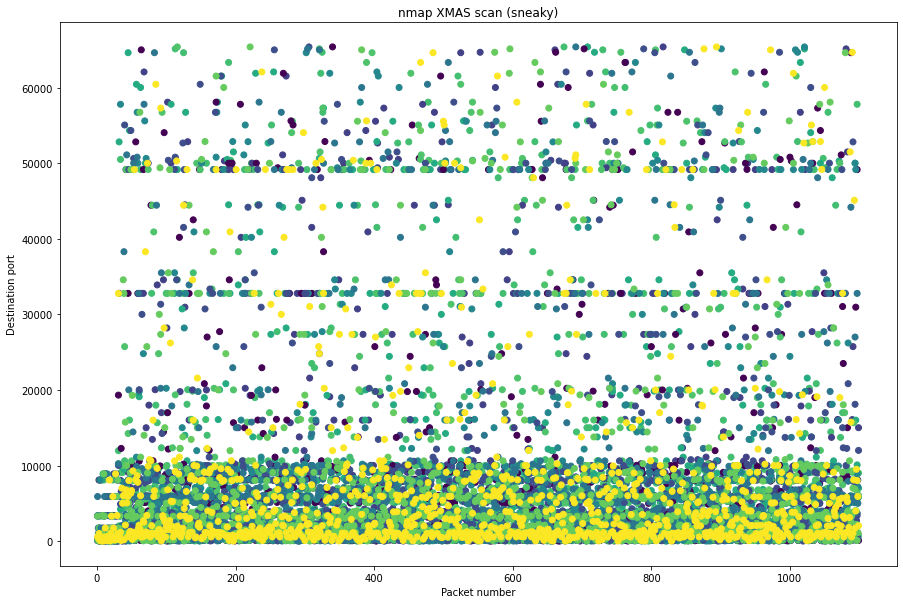

In [15]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [16]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [17]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

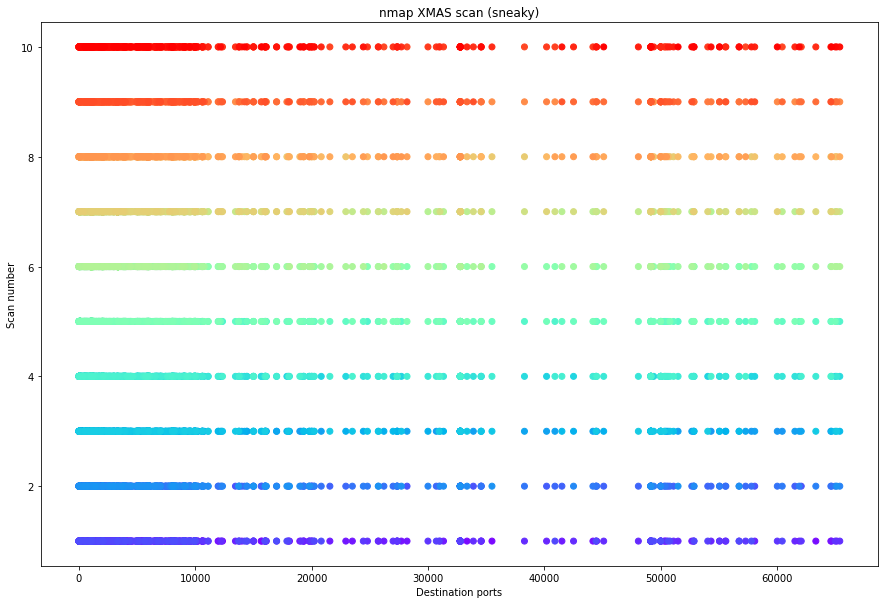

In [18]:
#y = tcp_sports
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()


In [19]:
unused_ports = []
used_ports = []
for x in range(1, 65536):
    if x not in tcp_dports:
        unused_ports.append(x)
    elif x in tcp_dports:
        used_ports.append(x)

In [20]:
print(len(unused_ports))

64535


In [21]:
print(len(used_ports))

1000


## Payloads

In [22]:
payloads.value_counts()

0.0    10990
dtype: int64

## IP-ID

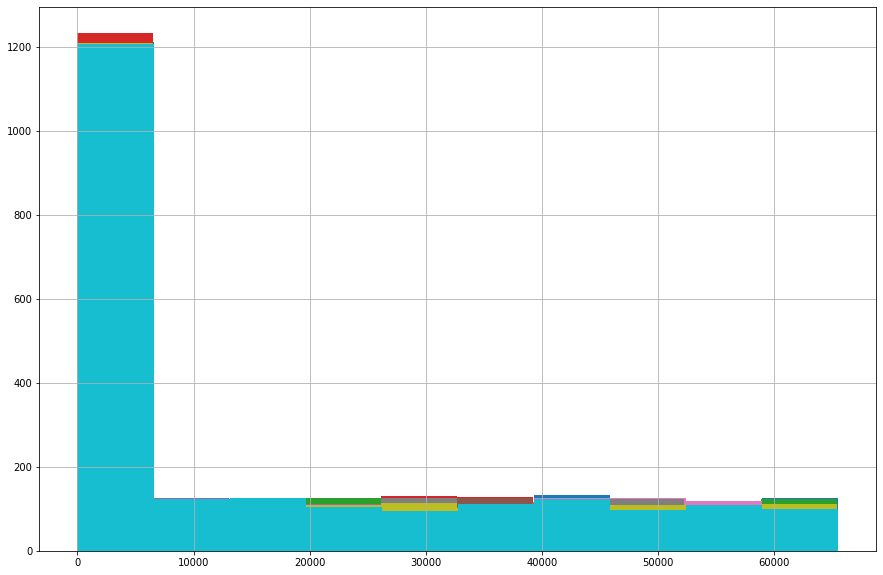

In [23]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

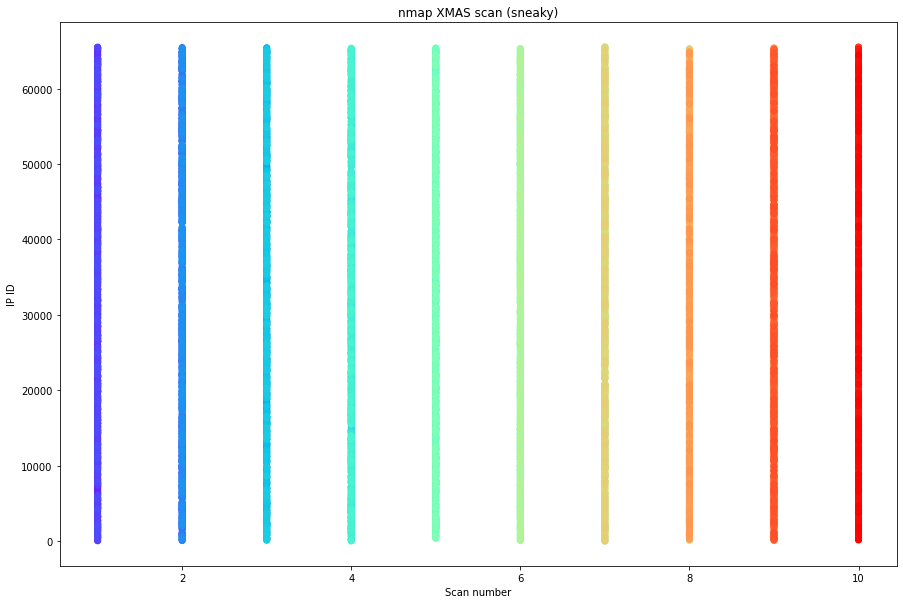

In [24]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()


In [25]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x

if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

SyntaxError: invalid syntax (<ipython-input-25-b7626db6fe82>, line 12)

In [ ]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.ylabel('Source ports')
    plt.xlabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [ ]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

## TCP Window size

In [ ]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

## Sequence number


In [ ]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

In [ ]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


In [ ]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

In [ ]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [ ]:
len(set(orders_port['sport']))

In [ ]:
orders_port['sport'].value_counts()[:30]

## Flags

In [ ]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")